In [2]:

import tensorflow as tf
import numpy as np
import csv
import os
import sys
sys.path.append("../")
import time

from data_read import *
from evaluation import *

0


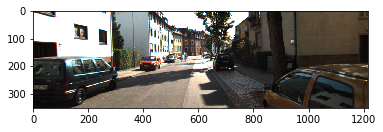

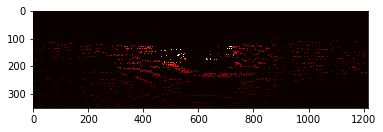

In [14]:
for i in range(1000):
    print (i)
    
    i=206
    img_batch,lidar_batch,ground_truth,semantic= read_one_val(i)
    
    plt.imshow(np.squeeze(img_batch))
    plt.show()
    
    plt.imshow(np.squeeze(lidar_batch),cmap='hot')
    plt.show()
    break
    
    


In [13]:
import copy
import numpy as np
import open3d as o3d

predicted_depth=np.squeeze(lidar_batch)

intrinsic_matrix=[721.5377, 0.0, 609.5593, 0.0, 721.5377, 149.854, 0.0, 0.0, 1.0]
intrinsic_matrix=np.asarray(intrinsic_matrix)
intrinsic_matrix=np.reshape(intrinsic_matrix,(3,3))
intrinsic_matrix=np.linalg.inv(intrinsic_matrix)
heigh,width=np.shape(predicted_depth)





points=[]
colors=[]
for i in range(heigh):
    for j in range(width):
        array=[j,i,1]
        array=np.asarray(array)

        points.append(np.dot(intrinsic_matrix,array)*predicted_depth[i,j])

        
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)

o3d.io.write_point_cloud("./pc_visulization/sync.ply", pcd)

True